<a href="https://colab.research.google.com/github/KIMBUMJU/CV/blob/main/DNN_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FCNN 이용하여 MNIST 분류하기



*   FCNN(Fully Connected Neuron Network) 이용하여 손글씨 MNIST 분류 진행
*   입력 데이터셋: Keras Dataset MNIST
*   이미지 분류 시 DNN을 사용



# **1. Import modules**

In [1]:
!pip install tensorflow==2.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 98.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.1


# **2. 데이터 불러오기**

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# 이미지 화소값은 0~255. 고로 255로 나눠주면 0~1로 스케일 변환됨

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
# 3차원 배열
# x_train: 60000개의 샘플이 있고 각각 28*28 픽셀 사이즈의 이미지
# x_test: 10000개의 샘플이 있고 각각 28*28 픽셀 사이즈의 이미지

x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
y_train.shape, y_test.shape

((60000,), (10000,))

# **3. FCNN 모델 구성**


*   FCNN 입력 구조: 2차원(Batch * row)
*   이미지 입력 데이터를 일렬로 쭉 펴서 모델에 주어야 하므로 Flatten 함수를 사용



In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])





1.   Sequential 모델: 레이어를 순차적으로 쌓을 수 있는 모델 생성. 입력 레이어부터 출력 레이어까지 순차적으로 레이어를 추가.
2.   Flatten 레이어: 입력 이미지를 1차원 벡터로 변환함
    * input_shape=(28, 28): 입력 데이터의 형상을 정의. 이 모델은 28*28 크기의 2차원 이미지 입력 받음.
    * 입력 데이터를 신경망의 Dense 레이어로 전달하기 위해 필요한 전처리 과정 수행.
3.   Dense 레이어: 밀집 연결(fully connected) 레이어. 128개의 뉴런을 갖고 각 뉴런은 이전 레이어의 모든 입력과 연결됨.
4.   Dropout 레이어: 과적합 방지를 위해 신경망의 일부 뉴런을 무작위로 비활성화함.
    * 0.2: 드롭아웃 비율을 0.2로 설정. 이는 20%의 뉴런을 비활성화하는 것을 의미함.
    * 드롭아웃은 학습 시기에만 적용됨. 평가 또는 예측 시에는 모든 뉴런 활성화.
5. 두번째 Dense 레이어: 출력 레이어. 10개의 뉴런을 갖고 있으며, 각 뉴런은 하나의 클래스에 해당함. 10개의 뉴런은 0~9 사이의 숫자를 예측하는 데 사용됨.
     * activation = 'softmax': 활성화 함수로 소프트맥스 사용.
     * 소프트맥스 함수는 각 클래스에 대한 확률을 출력. 이 출력값은 각 클래스에 대한 확률로 변환되며, 모든 확률의 합은 1이 됨.
     * 이 활성화 함수는 다중 클래스 분류 문제에 적합.











# **4. 모델 Compile**

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________




*   Output Shape의 첫 번째 값이 'None'으로 표시되는 이유: 해당 차원이 배치 크기(batch size)를 나타내기 때문. 배치 크기는 모델 컴파일 또는 학습 시에 정해지며, 모델 구조에서 미리 정해지지 않기 때문에 'None'으로 표시됨

---

1.   flatten_1 (Flatten): 784는 펼쳐진 입력 이미지의 총 픽셀 수(28*28)
2.   dense_2 (Dense): 128은 이 레이어의 유닛 수로, 각 샘플에 대해 128차원 벡터를 출력
3.   dropout_1 (Dropout): 드롭아웃 레이어는 입력 크기를 변경하지 않으므로 출력 형태는 이전 레이어와 동일
4.   dense_3 (Dense): 10은 이 레이어의 유닛 수로, 각 샘플에 대해 10차원 벡터를 출력. 이는 10개 클래스에 대한 확률을 나타냄




# **5. 학습 수행**

In [9]:
EPOCH = 50
BATCH_SIZE = 1024



*   EPOCH: 전체 데이터셋에 대해 순전파와 역전파 과정이 완료된 횟수를 의미. 각 에포크마다 모든 데이터셋이 모델에 한 번씩 전달되고, 모델의 가중치가 업데이트됨.
    * EPOCH = 50: 전체 데이터셋을 50번 반복하여 학습. 모델은 50번의 전체 데이터셋 학습을 진행함.
*   BATCH_SIZE: 한 번에 모델이 학습하는 데이터의 샘플 수를 결정. 한 번에 전체 데이터셋을 사용하지 않고, 작은 배치 단위로 데이터를 나누어 학습하는 방식. 배치 크기가 클수록 더 많은 메모리가 요구되지만, 계산이 더 효율적으로 수행될 수 있음.
    * BATCH_SIZE = 1024: 한 번의 배치에 1024개의 데이터 포인트가 사용됨. 모델은 1024개의 데이터 샘플을 한 번에 처리하고, 이에 대한 손실을 계산하고 역전파를 통해 가중치를 업데이트함.



In [10]:
from tensorflow import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [11]:
es = EarlyStopping(monitor='val_loss', patience = 4, verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only='True', verbose=1)



* EarlyStopping: 모델 학습을 조기에 중단시키는 콜백. 과적합 방지하고, 불필요한 계산을 줄임.
    * monitor = 'val_loss': 검증 손실('val_loss')을 모니터링함. 즉, 검증 데이터에 대한 손실 값을 관찰함.
    * patience = 4: 개선이 없는 에포크 수를 지정. 여기서는 4 에포크 동안 검증 손실('val_loss')이 개선되지 않으면 학습을 중단.
    * verbose = 1: 학습 중단 시 로그를 출력. 1로 설정하면 학습이 중단될 때 메세지가 출력됨.
* ModelCheckpoint: 모델의 체크포인트를 저장하는 콜백. 모델 학습 중 지정한 조건이 만족되면 모델의 가중치를 파일에 저장.
    * 'best_model.h5': 최적의 모델 가중치를 저장할 파일 이름을 지정. 여기서는 'best_model.h5' 파일에 저장함.
    * monitor = 'val_accuracy': 검증 정확도('val_accuracy')를 모니터링함. 즉, 검증 데이터에 대한 정확도 값을 관찰
    * mode = 'max': 모니터링할 지표('val_accuracy')를 최대화하는 방향으로 체크포인트를 저장. 검증 정확도가 최고값을 갱신할 때마다 모델을 저장. mode는 'min', 'max', 'auto' 중 하나로 설정.
    * save_best_only = 'true': true로 설정하면, 최적의 모델(여기서는 검증 정확도가 최고인 모델)만 저장. False로 설정할 시, 매 에포크마다 모델을 저장.




In [12]:
history = model.fit(x_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE, callbacks=[es, mc], validation_data=(x_test, y_test))

Epoch 1/50
57/59 [===========================>..] - ETA: 0s - loss: 0.8759 - accuracy: 0.7546
Epoch 1: val_accuracy improved from -inf to 0.90240, saving model to best_model.h5
59/59 [==============================] - 3s 10ms/step - loss: 0.8634 - accuracy: 0.7582 - val_loss: 0.3511 - val_accuracy: 0.9024
Epoch 2/50
44/59 [=====================>........] - ETA: 0s - loss: 0.3627 - accuracy: 0.8958

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


57/59 [===========================>..] - ETA: 0s - loss: 0.3516 - accuracy: 0.8994
Epoch 2: val_accuracy improved from 0.90240 to 0.92650, saving model to best_model.h5
59/59 [==============================] - 0s 5ms/step - loss: 0.3511 - accuracy: 0.8995 - val_loss: 0.2636 - val_accuracy: 0.9265
Epoch 3/50
46/59 [======================>.......] - ETA: 0s - loss: 0.2838 - accuracy: 0.9196
Epoch 3: val_accuracy improved from 0.92650 to 0.93780, saving model to best_model.h5
59/59 [==============================] - 0s 4ms/step - loss: 0.2787 - accuracy: 0.9209 - val_loss: 0.2189 - val_accuracy: 0.9378
Epoch 4/50
49/59 [=======================>......] - ETA: 0s - loss: 0.2414 - accuracy: 0.9315
Epoch 4: val_accuracy improved from 0.93780 to 0.94310, saving model to best_model.h5
59/59 [==============================] - 0s 4ms/step - loss: 0.2384 - accuracy: 0.9323 - val_loss: 0.1955 - val_accuracy: 0.9431
Epoch 5/50
50/59 [========================>.....] - ETA: 0s - loss: 0.2134 - accurac



*   history = model.fit()
    * history 속성: 학습 및 검증 데이터의 메트릭 값들을 에포크별로 저장하는 딕셔너리.
    * epoch 속성: 수행된 에포크의 리스트
    * params 속성: 모델 학습에 사용된 파라미터들에 대한 정보를 포함하는 딕셔너리.
    * model 속성: 학습에 사용된 모델 자체



# **6. 학습 결과 테스트**

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0670 - accuracy: 0.9792


[0.06698687374591827, 0.979200005531311]

# **7. 성능 그래프**

In [14]:
x_range = range(1, len(history.history['accuracy'])+1)

In [15]:
history

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
history.history

{'loss': [0.8634324073791504,
  0.3510586619377136,
  0.2787480056285858,
  0.23838280141353607,
  0.2102249711751938,
  0.19032704830169678,
  0.17417074739933014,
  0.16103829443454742,
  0.14732234179973602,
  0.14095459878444672,
  0.131084144115448,
  0.12204790860414505,
  0.11520206928253174,
  0.10730422288179398,
  0.10225469619035721,
  0.09971177577972412,
  0.09360675513744354,
  0.08869996666908264,
  0.08366094529628754,
  0.08041717857122421,
  0.07626242190599442,
  0.07382888346910477,
  0.07020112127065659,
  0.06954353302717209,
  0.06685259193181992,
  0.06380019336938858,
  0.061815205961465836,
  0.059546954929828644,
  0.0572485588490963,
  0.05525133013725281,
  0.05310368537902832,
  0.052209798246622086,
  0.05016910284757614,
  0.04888254031538963,
  0.04500724747776985,
  0.044850680977106094,
  0.043908942490816116,
  0.04268009960651398,
  0.0414104163646698,
  0.039582252502441406,
  0.038761939853429794,
  0.037989772856235504,
  0.03564837947487831,
  0

In [26]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [29]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 59}

In [30]:
history.model

In [31]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [21]:
len(history.history['accuracy'])

50

In [32]:
len(history.epoch)

50

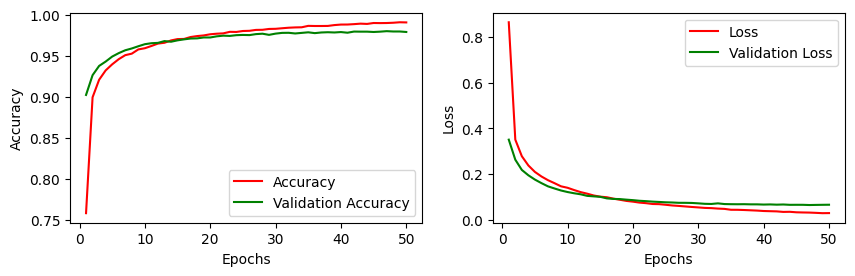

In [34]:
plt.figure(figsize=(10, 6))
plt.subplot(221)
plt.plot(x_range, history.history['accuracy'], color='red', label='Accuracy')
plt.plot(x_range, history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(222)
plt.plot(x_range, history.history['loss'], color='red', label='Loss')
plt.plot(x_range, history.history['val_loss'], color='green', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



*   plt.figure(figsize=(10,6))
    * 새로운 Figure(그림) 생성.
    * 그림의 크기를 가로 10인치, 세로 6인치로 설정.
    * 이 그림 안에 여러 개의 서브플롯 배치 가능.
*   plt.subplot(221)
    * 2*2 그리드의 첫 번째 위치(왼쪽 위)에 서브 플롯을 생성
    * 221의 의미:
        * 첫 번째 2: 전체 그리드의 행 수 (2행)
        * 두 번째 2: 전체 그리드의 열 수
        (2열)
        * 마지막 1: 서브플롯의 위치 (1번째 서브플롯)
*   plt.plot(x, y): x축 정보, y축 정보를 바탕으로 plot 생성
*   plt.xlabel(): x축 레이블 생성
*   plt.ylabel(): y축 레이블 생성
*   plt.legend(): 플롯에 범례를 추가함. 범례는 각 플롯의 'label' 속성에 따라 설정.


# **8. 실전 테스트: 손글씨 입력해서 분류 잘 하는지 평가**

In [18]:
x_test[0].shape

(28, 28)

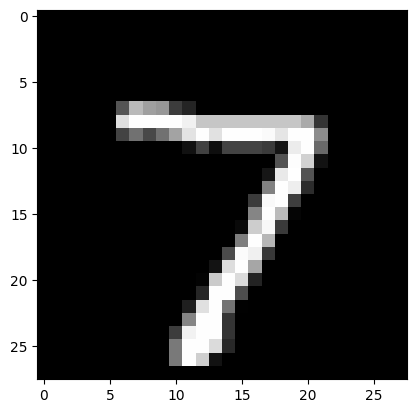

1/1 [==============================] - 0s 106ms/step
Prediction Probability:  [[6.2020354e-07 1.8086696e-10 2.9493542e-06 1.2075106e-04 2.1992347e-11
  1.1004005e-09 2.6726705e-12 9.9987268e-01 2.6337403e-08 2.9258915e-06]]
The Answer is  [7]


In [19]:
n = 0
plt.imshow(x_test[n], cmap='gray')
plt.show()

pred = model.predict(x_test[n].reshape(1, 28, 28))
answer = np.argmax(pred, axis=1)

print("Prediction Probability: ", pred)
print("The Answer is ", answer)

**pred = model.predict(x_test[n].reshape(1, 28, 28))**


☣ 이미지는 2차원 데이터인데 왜 reshape을 3차원으로 해주는가?: 이미지는 2차원인데 Dense 레이어는 1차원 배열을 입력 받을 수 있기 때문에 Flatten 레이어로 쫙 펴줘야한다. 그런데 모델에 데이터를 넣을 때는 위의 코드처럼 reshape(1, 28, 28) 이렇게 차원을 한 개 더 추가해준다. Tensorflow, Keras 모델을 사용할 때 입력 데이터의 차원에 배치 크기를 추가해야 한다. 왜냐하면 이 모델들은 배치 데이터를 입력으로 받고 배치 형태로 처리하기 때문이다. 여기서 배치 데이터는 여러 개의 28*28 이미지를 포함하는 3차원 배열이다. 모델을 학습하거나 예측을 수행할 때, 입력 데이터는 (batch_size, input_shape)의 형태를 가져야 한다. 이 때, input_shape은 모델이 처음 설정될 때 정의된 차원을 따릅니다. 예를 들어, 이미지가 28x28 픽셀이면 input_shape은 (28, 28)이 됩니다. 하지만 모든 Keras 모델은 데이터를 배치로 처리하므로, 실제 입력 형태는 (batch_size, 28, 28)이 되어야 합니다. 여기서 batch_size는 동시에 처리할 샘플의 수를 의미합니다.

---

예를 들어, 단일 이미지(28x28)를 모델에 입력하기 위해서는 이 이미지를 배치의 일부로 만들어야 하므로, 이를 (1, 28, 28)로 reshape하는 것입니다. 여기서 1은 배치 크기를 의미하며, 한 번에 하나의 이미지만 처리하고 있음을 나타냅니다.


---

# 단일 이미지 처리 예
pred = model.predict(x_test[n].reshape(1, 28, 28))







# 내용 정리


1.   Keras 손글씨 MNIST Dataset 활용
2.   FCNN 모델도 이미지 분류 가능


😠 이미지를 1차원으로 받아야 하기에 Flatten() 함수를 사용하여 입력받아야 함

